In [6]:
#imports

import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

#supress the warning
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# A University Announced Its On-Campus Placement Records For The Engineering Course. The Data Is From The Years 2013 And 2014.
# The Following Is The College Placements Data Compiled Over 2 years. Use This Data To Predict And Analyse Whether A Student Gets Placed, Based On His/Her Background.
# Perform Extensive EDAs And Bring Out Insights.
# Build A Robust Model Using ML Techniques Or Neural Networks. Use Multiple Algorithms.

In [7]:
#first we have to perform EDA
df=pd.read_csv("collegePlace1.csv")
df.info() #to check for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Hostel             2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   PlacedOrNot        2966 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 185.5+ KB


In [8]:
#there are no missing values
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


In [ ]:
#check for categorical colums in the tabel.
#here we can see that we have history of balcklog and hostel as categorical clum,we have to check for intership and cgpa later


In [9]:
df.shape

(2966, 8)

In [10]:
#check for dublicates and drop them and check for shape
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)
df.shape

1829


(1137, 8)

In [11]:
x=list(df.columns)
print(x)

['Age', 'Gender', 'Stream', 'Internships', 'CGPA', 'Hostel', 'HistoryOfBacklogs', 'PlacedOrNot']


In [12]:
def count_plot(x):
    plt.figure(figsize=(15,20))
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    
    for i in range(1,len(x)): #we have xcluded the age intentionally as it has differnt numerical values and can be check with histogram
        plt.subplot(2,4,i)
        plt.xticks(rotation = 90)
        sns.countplot(df[x[i]]) 

ValueError: could not convert string to float: 'Male'

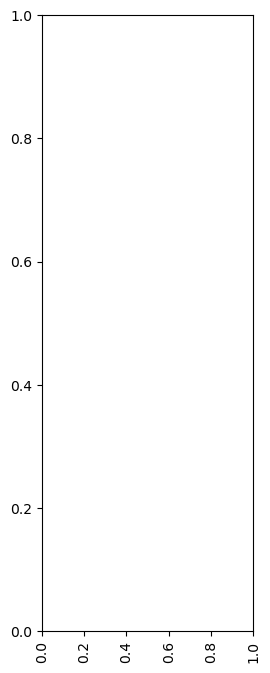

In [45]:
count_plot(x)

In [ ]:
#above code need to be check with sir



<Axes: ylabel='Age'>

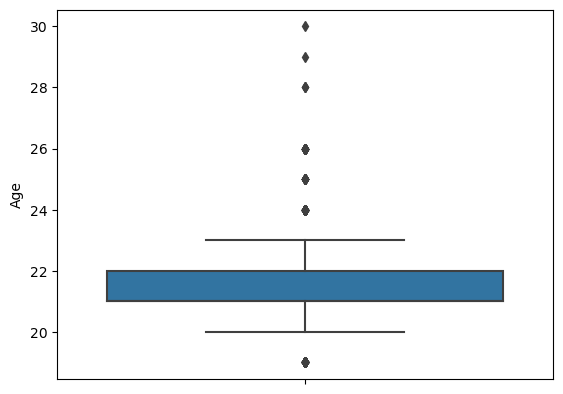

In [13]:
#age clumn
sns.boxplot(y=df["Age"])
#note:there seems to be outlier but actually there are no outlier as one can study till 30 years

In [14]:
df["PlacedOrNot"].value_counts()

1    659
0    478
Name: PlacedOrNot, dtype: int64

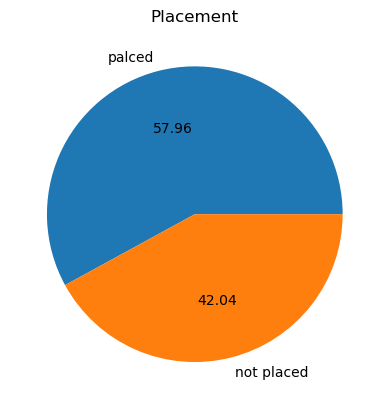

57% of the students (659) have been placed ,42% of the students (478) were not placed.


In [15]:
plt.pie(labels=["palced","not placed"],x=df["PlacedOrNot"].value_counts().values,autopct="%0.2f")
plt.title("Placement")
plt.show()

print("57% of the students (659) have been placed ,42% of the students (478) were not placed.")

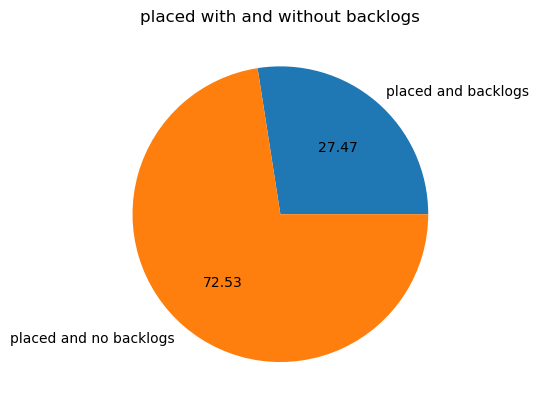

There are 72 % students placed without baclogs and 27% placed with baclog history


In [18]:
a=len(df[(df["PlacedOrNot"]==1)&(df["HistoryOfBacklogs"]==1)])
b=len(df[(df["PlacedOrNot"]==1)&(df["HistoryOfBacklogs"]==0)])
c=len(df[(df["PlacedOrNot"]==1)])

plt.pie(labels=["placed and backlogs","placed and no backlogs"],x=[a,b],autopct="%0.2f")
plt.title("placed with and without backlogs")
plt.show()
print("There are 72 % students placed without baclogs and 27% placed with baclog history")

156
322
478


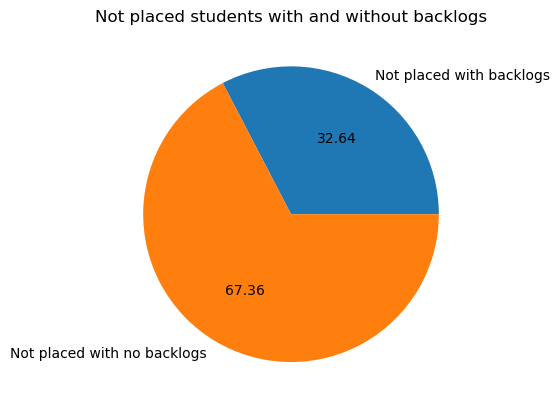

there are 478 students not placed out of which 156 students are  having backlogs and 322 students are not having backlogs
____________
Asit is clear that out of 478 students who are not placed 156 students have no backlogs means backlog isnt the only criteria for placement


In [29]:
print(len(df[(df["PlacedOrNot"]==0)&(df["HistoryOfBacklogs"]==1)]))
print(len(df[(df["PlacedOrNot"]==0)&(df["HistoryOfBacklogs"]==0)]))
print(len(df[(df["PlacedOrNot"]==0)]))

plt.pie(labels=["Not placed with backlogs","Not placed with no backlogs"],x=[156,322],autopct="%0.2f")
plt.title("Not placed students with and without backlogs")
plt.show()

print("there are 478 students not placed out of which 156 students are  having backlogs and 322 students are not having backlogs")
print("____________")
print("Asit is clear that out of 478 students who are not placed 156 students have no backlogs means backlog isnt the only criteria for placement")

In [26]:
x=df[(df["PlacedOrNot"]==0)&(df["HistoryOfBacklogs"]==0)]
x

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
5,22,Male,Electronics And Communication,0,6,0,0,0
7,21,Male,Information Technology,1,7,0,0,0
9,21,Female,Computer Science,1,6,1,0,0
10,22,Male,Computer Science,1,7,0,0,0
16,22,Female,Computer Science,1,7,1,0,0
...,...,...,...,...,...,...,...,...
2911,23,Male,Information Technology,1,6,1,0,0
2921,23,Male,Information Technology,0,6,0,0,0
2929,23,Female,Computer Science,0,6,1,0,0
2937,23,Male,Mechanical,0,6,0,0,0


In [28]:
x["CGPA"].value_counts() #checking for cgpa for the students who doesnt have backllogs but still didnt get the placement

7    153
6    112
5     57
Name: CGPA, dtype: int64

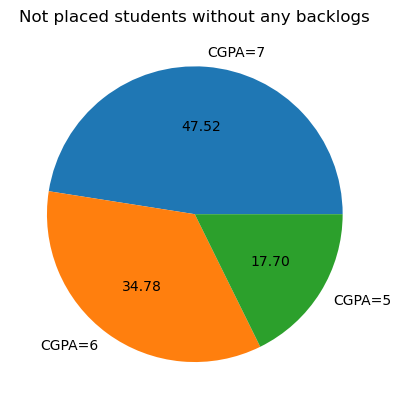

There are 300+ students who are not having backlogs and not placed because all of them are having CGPA<=7,so CGPA is a significant criteria for placements


In [33]:
plt.pie(labels=["CGPA=7","CGPA=6","CGPA=5"],x=x["CGPA"].value_counts().values,autopct="%0.2f")
plt.title("Not placed students without any backlogs")
plt.show()
print("There are 300+ students who are not having backlogs and not placed because all of them are having CGPA<=7,so CGPA is a significant criteria for placements")

In [36]:
print("Students placed with CGPA>7 are",len(df[(df["CGPA"]>7)& (df["PlacedOrNot"]==1)]))
print("Students not placed with CGPA>7 are",len(df[(df["CGPA"]>7)& (df["PlacedOrNot"]==0)]))
print("Students placed with CGPA>7 are having backlogs",len(df[(df["CGPA"]>7)& (df["PlacedOrNot"]==1)&(df["HistoryOfBacklogs"]==1)]))

print("---------------")

Students placed with CGPA>7 are 367
Students not placed with CGPA>7 are 0
Students placed with CGPA>7 are having backlogs 115
---------------


In [37]:
print("There is an observation that the students securing CGPA>7 are all placed irrespective of their backlog ")

There is an observation that the students securing CGPA>7 are all placed irrespective of their backlog 


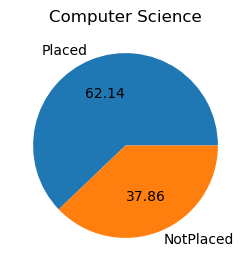

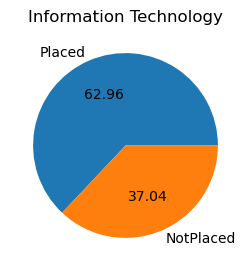

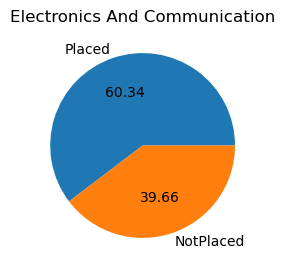

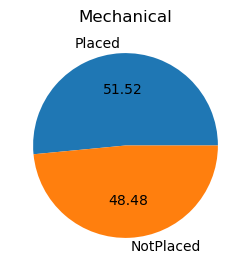

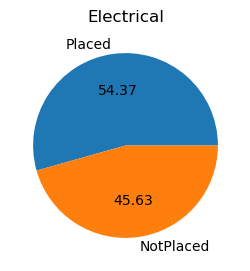

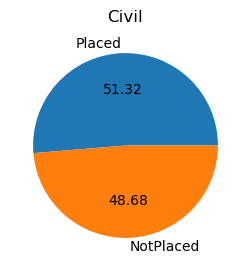

In [40]:
c=df["Stream"].value_counts().index
for i in range(len(c)):
    b=df.groupby(by="Stream")
    y=b.get_group(c[i])["PlacedOrNot"].value_counts()
    plt.figure(figsize=(3,3))
    plt.plot(i)
    plt.pie(labels=["Placed","NotPlaced"],x=y.values,autopct="%.2f")
    plt.title(f"{c[i]}")
    plt.show()

In [41]:
b.get_group("Computer Science")["PlacedOrNot"].value_counts()

1    151
0     92
Name: PlacedOrNot, dtype: int64

In [43]:
a=len(df[(df["Internships"]==0)&(df["PlacedOrNot"]==1)])
b=len(df[(df["Internships"]>0)&(df["PlacedOrNot"]==1)])
c=len(df[(df["PlacedOrNot"]==1)])

print(f""" The number of students total placed are {c} out of which {b} studnets are placed who have done internship whearas {a}
students are placed without doing internship""")



 The number of students total placed are 659 out of which 427 studnets are placed who have done internship whearas 232
students are placed without doing internship


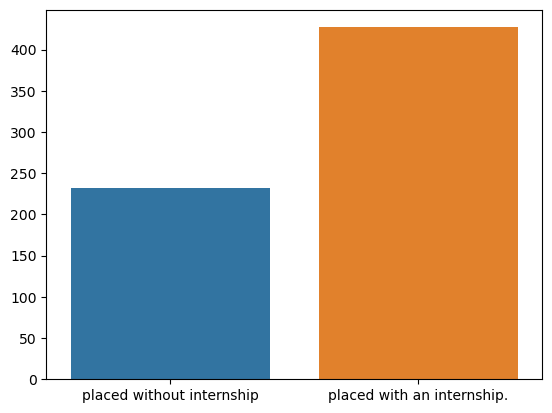

In [44]:
sns.barplot(y=[a,b],x=["placed without internship","placed with an internship."])
plt.show()

In [45]:
df.columns

Index(['Age', 'Gender', 'Stream', 'Internships', 'CGPA', 'Hostel',
       'HistoryOfBacklogs', 'PlacedOrNot'],
      dtype='object')

In [47]:
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


<Axes: >

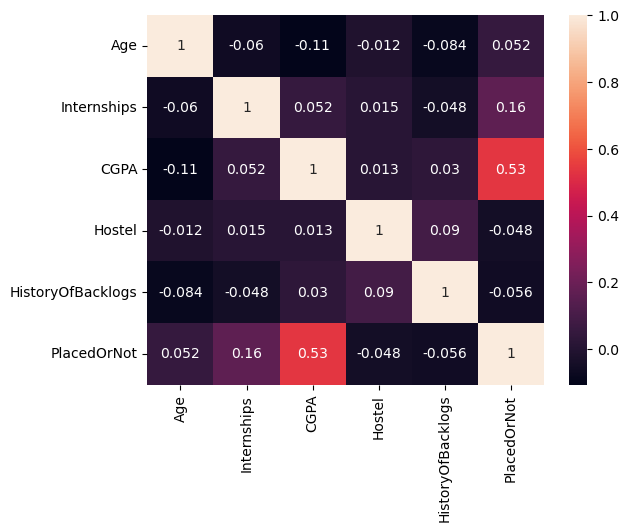

In [48]:
sns.heatmap(data=df.corr(),annot=True) #checking co relation matrix

In [49]:
from sklearn.preprocessing import LabelEncoder
cols=["Gender","Stream"]
#encode labels of objects dtype multiple columns at once
df[cols]=df[cols].apply(LabelEncoder().fit_transform)
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,1,3,1,8,1,1,1
1,21,0,1,0,7,1,1,1
2,22,0,4,1,6,0,0,1
3,21,1,4,0,8,0,1,1
4,22,1,5,0,8,1,0,1


In [50]:
x=df.drop("PlacedOrNot",axis=1).values #creating independent variable
y=df["PlacedOrNot"].values #target variable


In [52]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

#scaling the independent variable

from sklearn.preprocessing import StandardScaler
standard_Scaler=StandardScaler()
x_train=standard_Scaler.fit_transform(x_train) #fit generates the parameters ,transform applies
x_test=standard_Scaler.fit_transform(x_test)

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn  import metrics

log_reg= LogisticRegression(random_state=10)
log_reg.fit(x_train,y_train)
y_pred_test=log_reg.predict(x_test)
y_pred_train=log_reg.predict(x_train)

print("Reports for test data")
print(metrics.classification_report(y_test,y_pred_test))

print("Reports for train data")
print(metrics.classification_report(y_train,y_pred_train))

Reports for test data
              precision    recall  f1-score   support

           0       0.67      0.60      0.63       100
           1       0.71      0.77      0.74       128

    accuracy                           0.70       228
   macro avg       0.69      0.69      0.69       228
weighted avg       0.70      0.70      0.69       228

Reports for train data
              precision    recall  f1-score   support

           0       0.69      0.64      0.66       378
           1       0.76      0.79      0.77       531

    accuracy                           0.73       909
   macro avg       0.72      0.72      0.72       909
weighted avg       0.73      0.73      0.73       909



In [ ]:
#we can notice that we are not having high variance problm or overfit issue


In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV

fit_dt = DecisionTreeClassifier(random_state=17)

param_dist = {'max_depth': [2, 3, 4,5,6,7,8,9,10],
              'criterion': ['gini', 'entropy'],
             'max_leaf_nodes':[4,6,8,10,12,14]}

cv_dt = GridSearchCV(fit_dt, cv = 15,
                     param_grid=param_dist)

cv_dt.fit(x_train, y_train)

print(cv_dt.best_score_)

y_pred=cv_dt.predict(x_test)

accuracy_score = accuracy_score(y_test,y_pred)
print('Accuracy Score for model for test data is: ',accuracy_score)

0.8351001821493627
Accuracy Score for model for test data is:  0.8026315789473685


In [55]:
#checking for clasiification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.89      0.80       100
           1       0.90      0.73      0.81       128

    accuracy                           0.80       228
   macro avg       0.81      0.81      0.80       228
weighted avg       0.82      0.80      0.80       228



In [57]:
y_pred_train=cv_dt.predict(x_train)
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.73      0.97      0.83       378
           1       0.97      0.75      0.85       531

    accuracy                           0.84       909
   macro avg       0.85      0.86      0.84       909
weighted avg       0.87      0.84      0.84       909



In [58]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier #RandomForestRegressor

fit_rf = RandomForestClassifier(random_state=3)

In [59]:
# Providing the different values of hyperparameters
param_dist = {'max_depth': [2, 3, 4,6,8],
              'max_features': ['auto', 'sqrt'],
              'criterion': ['gini', 'entropy'],
             'oob_score' : [True, False],
             'n_estimators':[10,15,20,25,30]}

# Running gridsearchCV to check for all the different PnCs of these parameter values
cv_rf = GridSearchCV(fit_rf, cv =5,
                     param_grid=param_dist)

#Fitting the train set , so that grid search is executed on this dataset
cv_rf.fit(x_train, y_train)

#Printing the best parameters by using best_params
print('Best Parameters using grid search: \n', cv_rf.best_params_)   #to get best Hyperparameters

Best Parameters using grid search: 
 {'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 25, 'oob_score': True}


In [60]:
y_pred = cv_rf.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.80      0.76       100
           1       0.83      0.77      0.80       128

    accuracy                           0.78       228
   macro avg       0.78      0.78      0.78       228
weighted avg       0.79      0.78      0.78       228



In [61]:
y_pred_train=cv_rf.predict(x_train)
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.75      0.94      0.83       378
           1       0.95      0.78      0.85       531

    accuracy                           0.84       909
   macro avg       0.85      0.86      0.84       909
weighted avg       0.86      0.84      0.84       909



In [ ]:
#compare to decion tree,randomforest performnc is not good



In [62]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train,y_train)
y_test_predict = classifier.predict(x_test)
y_train_predict = classifier.predict(x_train)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_predict))
print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       0.70      0.69      0.70       100
           1       0.76      0.77      0.77       128

    accuracy                           0.74       228
   macro avg       0.73      0.73      0.73       228
weighted avg       0.74      0.74      0.74       228

              precision    recall  f1-score   support

           0       0.71      0.71      0.71       378
           1       0.79      0.79      0.79       531

    accuracy                           0.76       909
   macro avg       0.75      0.75      0.75       909
weighted avg       0.76      0.76      0.76       909



In [ ]:
#we can observ that it is not having high performance

In [63]:
# K nearest neighbour
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

error = []

# May take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,x_train,y_train,cv=5)
    error.append(1-score.mean())
    
# k = 1, accuracy rate = 0.3
# k = 2, accuracy rate = .7

Text(0, 0.5, 'Accuracy Rate')

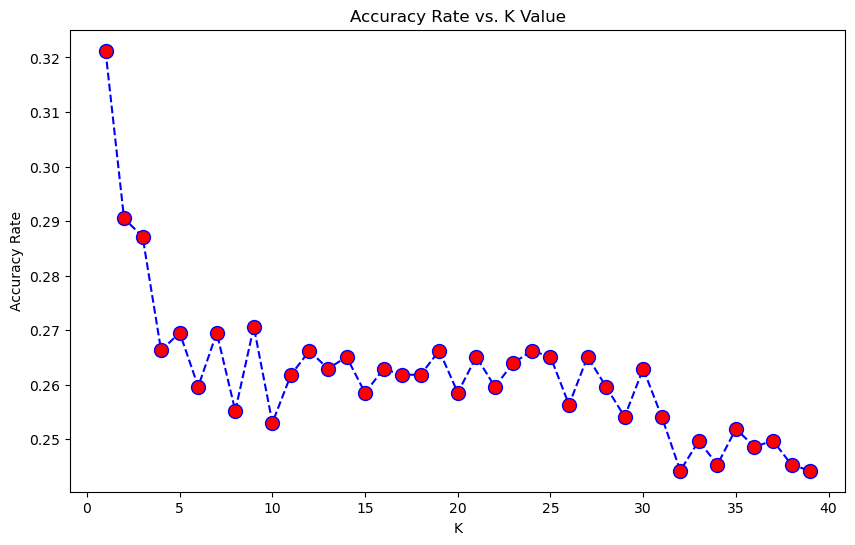

In [64]:
plt.figure(figsize=(10,6))

plt.plot(range(1,40),error,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')

In [65]:
#we can see that we have a constant value of 17 ,so lets take neighbour num as 17
knn = KNeighborsClassifier(n_neighbors=17)

knn.fit(x_train,y_train)
pred = knn.predict(x_test)

print('WITH K=30')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=30


[[69 31]
 [29 99]]


              precision    recall  f1-score   support

           0       0.70      0.69      0.70       100
           1       0.76      0.77      0.77       128

    accuracy                           0.74       228
   macro avg       0.73      0.73      0.73       228
weighted avg       0.74      0.74      0.74       228



In [66]:
#SVM

tuned_parameter = {'C': [0.1, 1, 10, 100, 1000],        
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],  
              'kernel': ['linear','rbf','ploy']}

In [67]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

svc = SVC(random_state = 5)
model_svm = GridSearchCV(svc,tuned_parameter,cv=5)
model_svm.fit(x_train,y_train)
print(model_svm.best_params_)

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


In [68]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf',C=1,gamma=0.1,random_state = 5)
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.74      0.71       100
           1       0.78      0.73      0.76       128

    accuracy                           0.74       228
   macro avg       0.73      0.74      0.73       228
weighted avg       0.74      0.74      0.74       228



In [71]:
#As decision tree is given best result,lets check the result for complete data set.
from sklearn.model_selection import cross_val_score

scores=cross_val_score(cv_dt,x,y,cv=15)
scores.mean()

0.8241988304093567

In [72]:
#checking for randomforest as well by removing some parameters 
param_dist = {'max_depth': [2, 3, 4,6,8,10],
              'max_features': ['auto', 'sqrt'],
             'n_estimators':[10,15,20,25,30]}

# Running gridsearchCV to check for all the different PnCs of these parameter values
cv_rf = GridSearchCV(fit_rf, cv =10,
                     param_grid=param_dist)

#Fitting the train set , so that grid search is executed on this dataset
cv_rf.fit(x_train, y_train)

#Printing the best parameters by using best_params
print('Best Parameters using grid search: \n', cv_rf.best_params_)   #to get best Hyperparameters

Best Parameters using grid search: 
 {'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 15}


In [73]:
y_pred1 = cv_rf.predict(x_test)
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.73      0.83      0.78       100
           1       0.85      0.77      0.81       128

    accuracy                           0.79       228
   macro avg       0.79      0.80      0.79       228
weighted avg       0.80      0.79      0.79       228



In [74]:
y_pred_train = cv_rf.predict(x_train)
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.74      0.93      0.83       378
           1       0.94      0.77      0.85       531

    accuracy                           0.84       909
   macro avg       0.84      0.85      0.84       909
weighted avg       0.86      0.84      0.84       909

